<a href="https://colab.research.google.com/github/DrashiDave/DATA-602/blob/main/Week%20-%209/AB37815_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preamble

In [ ]:
from google.colab import drive
import numpy as np
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For convenience, the `plot_silhouette` function discussed in class is below.

In [ ]:
import matplotlib.cm as cm
def plot_silhouette(samples,
                    labels,
                    ax=None,
                    cmap='Dark2'):
  if (ax is None):
    ax = plt.gca()

  # sort samples by label, and add index
  df = (np
     .c_[samples, labels]
     .view(dtype=[("samples", float), ("labels", float)]))
  df.sort(axis=0, order=["labels", "samples"])
  df = np.c_[df.view(float), np.arange(df.shape[0])]

  # bar plot
  z = ax.barh(df[:,2], df[:,0], 1)

  #color map for plotting
  cmap = cm.get_cmap(cmap)

  #set bar colors
  maxcluster = np.max(df[:, 1])
  for ix, k in enumerate(df):
    z[ix].set_color(cmap(k[1]/maxcluster))

  #label y axis ticks
  yticks = []
  yticklabels = []

  bounds = np.r_[np.argwhere(np.diff(df[:,1], prepend=[0]) > 0).ravel(),
                 df.shape[0]].ravel()
  for ix, b in enumerate(bounds):
    low = bounds[ix - 1] if ix > 0 else 0
    high = b
    yticks.append((low + high)/2)
    yticklabels.append(df[low,1].astype(labels.dtype))

  #axis decorations
  bounds, yticks, yticklabels
  ax.set_yticks(yticks)
  ax.set_yticklabels(yticklabels)
  ax.grid()
  ax.set_ylabel("Cluster")
  ax.set_xlabel("Silhouette")
  return ax

# Problem 1

In the 602 shared drive, the file /data/cluster.txt contains a features matrix $\mathbf{X}\in\mathbb{R}^{10,000\times20}$.  (You can use `np.loadtxt` to read the file as a numpy matrix.)  This features was generated from scikit-learn's `make_blobs` function with parameters of `n_features=20` and centers uniformly distributed in $[-5, 5]$ along each axis.  The dataset was produced with at least 5 but no more than 15 clusters.  Find the number of clusters used to generate the dataset (i.e., $k$ that best clusters the data), and justify your conclusion using silhouette plots.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
X = np.loadtxt('/content/drive/Shareddrives/DS602-F22/Data/cluster.txt')

In [ ]:
# Range of k values to try
cluster_range = range(5, 16)
sil_scores = []

In [ ]:
# K-means clustering for each k and compute silhouette score
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    sil_scores.append(score)
    print(f'k={k}, Silhouette Score={score}')

k=5, Silhouette Score=0.5839525560184549
k=6, Silhouette Score=0.4780111250593556
k=7, Silhouette Score=0.36321707625952593
k=8, Silhouette Score=0.3609588129935265
k=9, Silhouette Score=0.2570992324513009
k=10, Silhouette Score=0.1510518961133496
k=11, Silhouette Score=0.045852307016486835
k=12, Silhouette Score=0.04488096673286498
k=13, Silhouette Score=0.04350062043064428
k=14, Silhouette Score=0.04293213001133596
k=15, Silhouette Score=0.042147016983163296


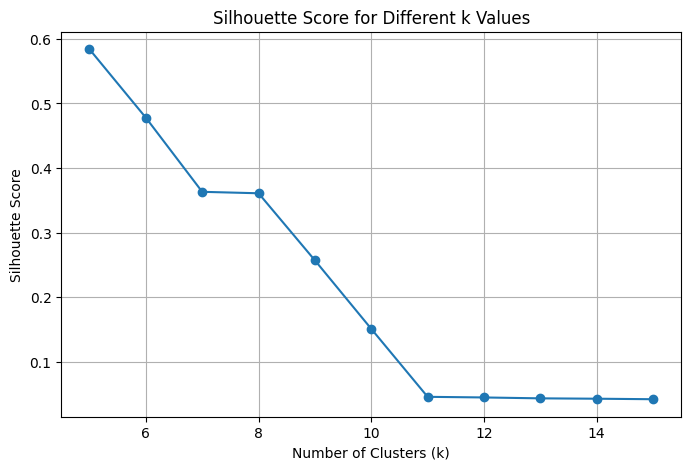

In [ ]:
# Silhouette scores against number of clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sil_scores, marker='o')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
# Best k is the one with the highest silhouette score
best_k = cluster_range[np.argmax(sil_scores)]
print(f'The best number of clusters is {best_k}')

The best number of clusters is 5


The best number of clusters is here 5, as it makes the silhouette score to gain its maximum value at about 0.584. This high value shows that all data points are properly divided into five tightly-packed sets that are distinctly separate from one another. However, for k > 5 the silhouette score decreases drastically indicating poor clustering with overlaps in boundaries of clusters. So, 5 clusters draw a better line between cohesion and separation in this case.

# Problem 2
The Fashion-MNIST dataset is a dataset of 10,000 grayscale images of size $28\times28$.  Each image depicts an article of clothing.  Load the dataset from OpenML (the dataset name is "Fashion-MNIST") and retain only the first 5,000 images.  Find an optimal number of Gaussian components based on the Akaike Information Criterion (AIC), and use the AIC scores to cluster the data using a GMM.  Visually inspect the model outcomes.  Is the clustering the model selected meaningful (e.g., are the cluster separations intuitive)?

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [ ]:
from sklearn.datasets import fetch_openml
X, _ = fetch_openml("Fashion-MNIST", return_X_y=True, as_frame=False)
# keep only the first 5,000 images
X = X[:5000,:]

In [ ]:
# Range of components for GMM
component_range = range(2, 21)
aic_values = []

In [ ]:
# Fit GMM for each number of components and compute AIC
for num_components in component_range:
    gmm_model = GaussianMixture(n_components=num_components, random_state=42)
    gmm_model.fit(X)
    aic = gmm_model.aic(X)
    aic_values.append(aic)
    print(f'Number of components={num_components}, AIC={aic}')


Number of components=2, AIC=33131036.43801663
Number of components=3, AIC=27834788.11897612
Number of components=4, AIC=27503102.848684974
Number of components=5, AIC=23167044.907398608
Number of components=6, AIC=20597449.300262686
Number of components=7, AIC=19860512.703475785
Number of components=8, AIC=12404440.918418717
Number of components=9, AIC=10004465.008493584
Number of components=10, AIC=8015006.594383568
Number of components=11, AIC=6394622.342103171
Number of components=12, AIC=5385654.807865234
Number of components=13, AIC=1980739.960039163
Number of components=14, AIC=1650421.7601563018
Number of components=15, AIC=-709701.2046656013
Number of components=16, AIC=-1660089.2658604123
Number of components=17, AIC=-2698849.5259915646
Number of components=18, AIC=-4746590.792784676
Number of components=19, AIC=-5725873.97831348
Number of components=20, AIC=-5944877.685135052


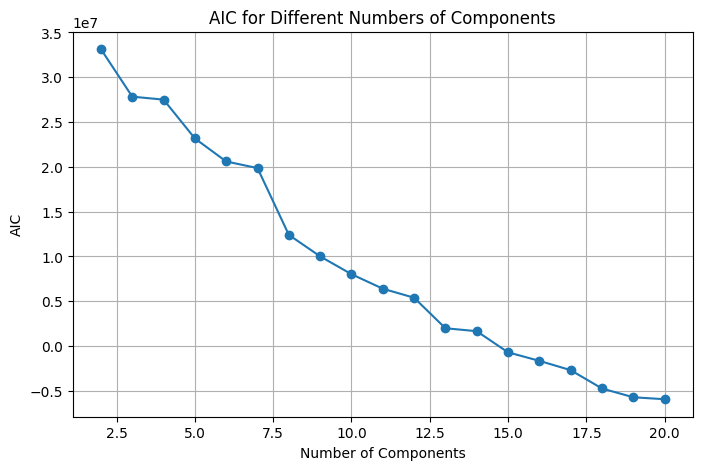

In [ ]:
# Plot AIC scores
plt.figure(figsize=(8, 5))
plt.plot(component_range, aic_values, marker='o')
plt.title('AIC for Different Numbers of Components')
plt.xlabel('Number of Components')
plt.ylabel('AIC')
plt.grid(True)
plt.show()

In [ ]:
# Finding the Optimal number of components, onw with lowest AIC
optimal_components = component_range[np.argmin(aic_values)]
print(f'The optimal number of Gaussian components is {optimal_components}')

The optimal number of Gaussian components is 20


Now using Principal Component Analysis (PCA), which is a great way to reduce the dimensionality of the Fashion-MNIST dataset and visualize the clustering results more effectively. Reducing to 2 or 3 principal components can allow us to observe how well-separated the clusters are in lower-dimensional space.

In [ ]:
# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [ ]:
# Fitting GMM on the PCA-reduced data with the optimal number of components
gmm_model_pca = GaussianMixture(n_components=optimal_components, random_state=42)
labels_pca = gmm_model_pca.fit_predict(X_pca)

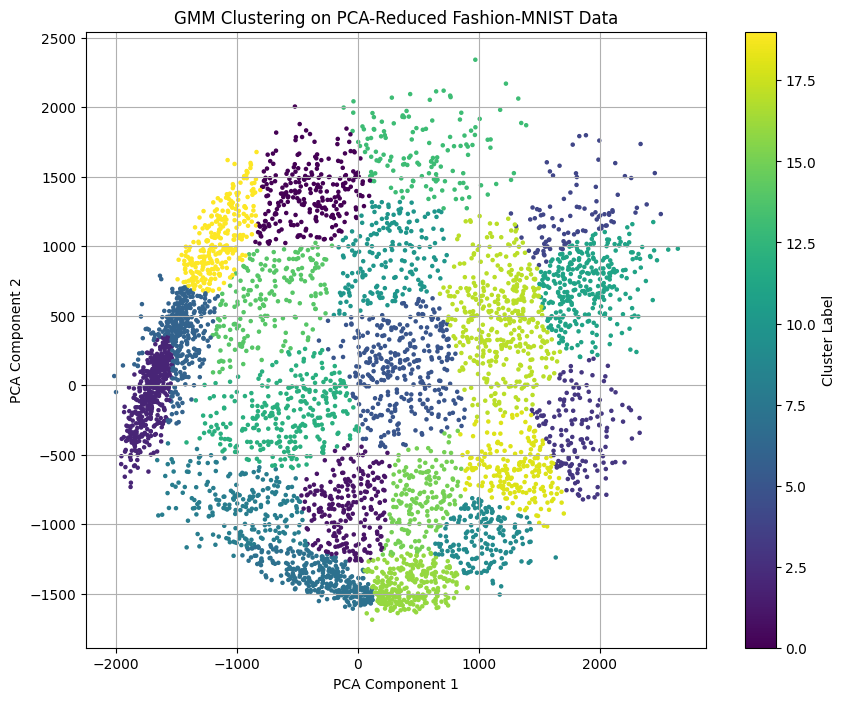

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', s=5)
plt.colorbar(label='Cluster Label')
plt.title('GMM Clustering on PCA-Reduced Fashion-MNIST Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

The GMM model with 20 components partially identifies the clustering structure in Fashion-MNIST, based on both the AIC plot and PCA representation shown below. While the PCA plot reveals a certain degree of separation among clusters, there is still significant overlap which suggests that some categories are simply not perfectly separable in reduced dimensional space. The clustering makes sense for the most part, it finds generalized patterns (and not to be interpreted as clear separation), likely because of many visual similarities found across certain types clothing.

# Problem 3
Import the MNIST-784 dataset (handwritten numbers), and keep only observations labeled as "7".   Using an outlier detection method of your choice, identify outlier observations, i.e., observations that do not resemble other observations in the dataset.  Display a sample of 5-10 detected outlier observations.

One-Class SVM is used here.

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [ ]:
# Load MNIST-784 using fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [ ]:
# Normalize and keep only digit '7'
data_normalized = X[y == '7'] / 255.0

In [ ]:
# Fitting One-Class SVM for outlier detection
oc_svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
oc_svm_model.fit(data_normalized)

OneClassSVM(gamma='auto', nu=0.05)

In [ ]:
# Predicting outliers (-1) and inliers (1)
predicted_outliers = oc_svm_model.predict(data_normalized)

In [ ]:
# Identifying the outlier indices (label -1 represents outliers)
outlier_indices = np.where(predicted_outliers == -1)[0]

In [ ]:
# Displaying a sample of 5-10 outlier observations
num_samples = 10
sample_outlier_indices = np.random.choice(outlier_indices, size=min(num_samples, len(outlier_indices)), replace=False)

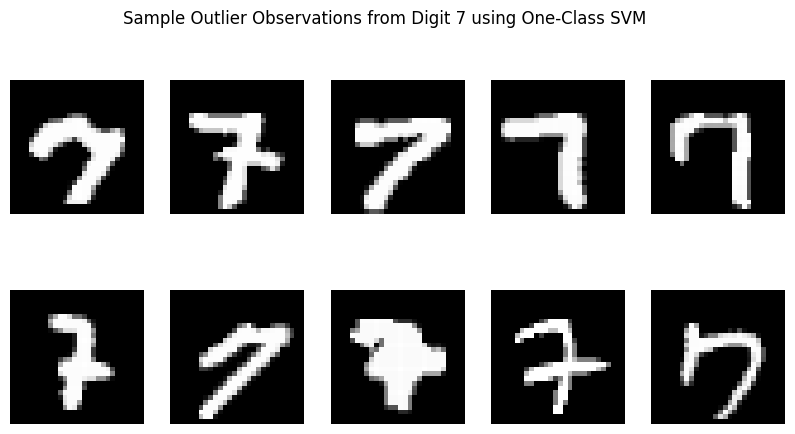

In [ ]:
plt.figure(figsize=(10, 5))
for i, idx in enumerate(sample_outlier_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data_normalized[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('Sample Outlier Observations from Digit 7 using One-Class SVM')
plt.show()

One-Class SVM is effectively used to identify outliers within the MNIST dataset and focuses its effort on '7' labeled observations. Since there is only a single class in modeling the data, it works out the inherent structure and the characteristics of the digit. Simultaneously, it also separates the abnormalities of some sample points that are far apart from this pattern. Thus, it yielded a robust performance in finding out the unusual samples.